In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Load the dataset with a different encoding
data = pd.read_csv(r'Petrol.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(data.head())

# Handle null values by dropping rows with nulls
data = data.dropna()




   #        Country  Daily Oil Consumption (Barrels) World Share  \
0  1  United States                         19687287      20.30%   
1  2          China                         12791553      13.20%   
2  3          India                          4443000       4.60%   
3  4          Japan                          4012877       4.10%   
4  5         Russia                          3631287       3.70%   

   Yearly Gallons Per Capita  Price Per Gallon (USD)  Price Per Liter (USD)  \
0                      934.3                    5.19                   1.37   
1                      138.7                    5.42                   1.43   
2                       51.4                    5.05                   1.33   
3                      481.5                    4.69                   1.24   
4                      383.2                    3.41                   0.90   

   Price Per Liter (PKR)  
0                 289.97  
1                 302.87  
2                 281.93  
3       

In [2]:
data.head()

,#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
0,1,United States,19687287,20.30%,934.3,5.19,1.37,289.97
1,2,China,12791553,13.20%,138.7,5.42,1.43,302.87
2,3,India,4443000,4.60%,51.4,5.05,1.33,281.93
3,4,Japan,4012877,4.10%,481.5,4.69,1.24,262.05
4,5,Russia,3631287,3.70%,383.2,3.41,0.90,190.56


In [3]:
LinearRegression

sklearn.linear_model._base.LinearRegression

In [4]:
X = data[['Yearly Gallons Per Capita', 'Price Per Gallon (USD)']]
y = data['Daily Oil Consumption (Barrels)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2, linear_regressor.coef_, linear_regressor.intercept_


(414728884467.4274,
 -0.5074024344506645,
 array([   834.9257656 , -22247.94178177]),
 449119.2678203881)

In [5]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [6]:
threshold = 5000000
data['High_Consumption'] = (data['Daily Oil Consumption (Barrels)'] > threshold).astype(int)

# Select features and binary target for Logistic Regression
X = data[['Yearly Gallons Per Capita', 'Price Per Gallon (USD)']]
y = data['High_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regressor.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(1.0,
 array([[37]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        37\n\n    accuracy                           1.00        37\n   macro avg       1.00      1.00      1.00        37\nweighted avg       1.00      1.00      1.00        37\n')

In [7]:
# Remove rows with null values
data_cleaned = data.dropna()

# Check if there are any null values remaining
null_values = data_cleaned.isnull().sum()

data_cleaned.head(), null_values


(   #        Country  Daily Oil Consumption (Barrels) World Share  \
 0  1  United States                         19687287      20.30%   
 1  2          China                         12791553      13.20%   
 2  3          India                          4443000       4.60%   
 3  4          Japan                          4012877       4.10%   
 4  5         Russia                          3631287       3.70%   
 
    Yearly Gallons Per Capita  Price Per Gallon (USD)  Price Per Liter (USD)  \
 0                      934.3                    5.19                   1.37   
 1                      138.7                    5.42                   1.43   
 2                       51.4                    5.05                   1.33   
 3                      481.5                    4.69                   1.24   
 4                      383.2                    3.41                   0.90   
 
    Price Per Liter (PKR)  High_Consumption  
 0                 289.97                 1  
 1        

In [8]:
import pandas as pd

# Load the dataset
file_path = 'petrol.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from specific columns
columns_to_check = ['Daily Oil Consumption (Barrels)', 'Yearly Gallons Per Capita', 'Price Per Gallon (USD)']
for column in columns_to_check:
    data = remove_outliers_iqr(data, column)

# Check the dataset after removing outliers
print(data.describe())


                #  Daily Oil Consumption (Barrels)  Yearly Gallons Per Capita  \
count  133.000000                       133.000000                 133.000000   
mean   104.451128                     96653.526316                 188.751880   
std     42.179175                    120042.776327                 187.205531   
min     31.000000                        70.000000                   2.200000   
25%     70.000000                     18001.000000                  35.600000   
50%    104.000000                     49000.000000                 125.400000   
75%    141.000000                    137000.000000                 279.700000   
max    180.000000                    582161.000000                 812.700000   

       Price Per Gallon (USD)  Price Per Liter (USD)  Price Per Liter (PKR)  
count              133.000000             133.000000             133.000000  
mean                 5.256692               1.389023             293.680376  
std                  1.945229       

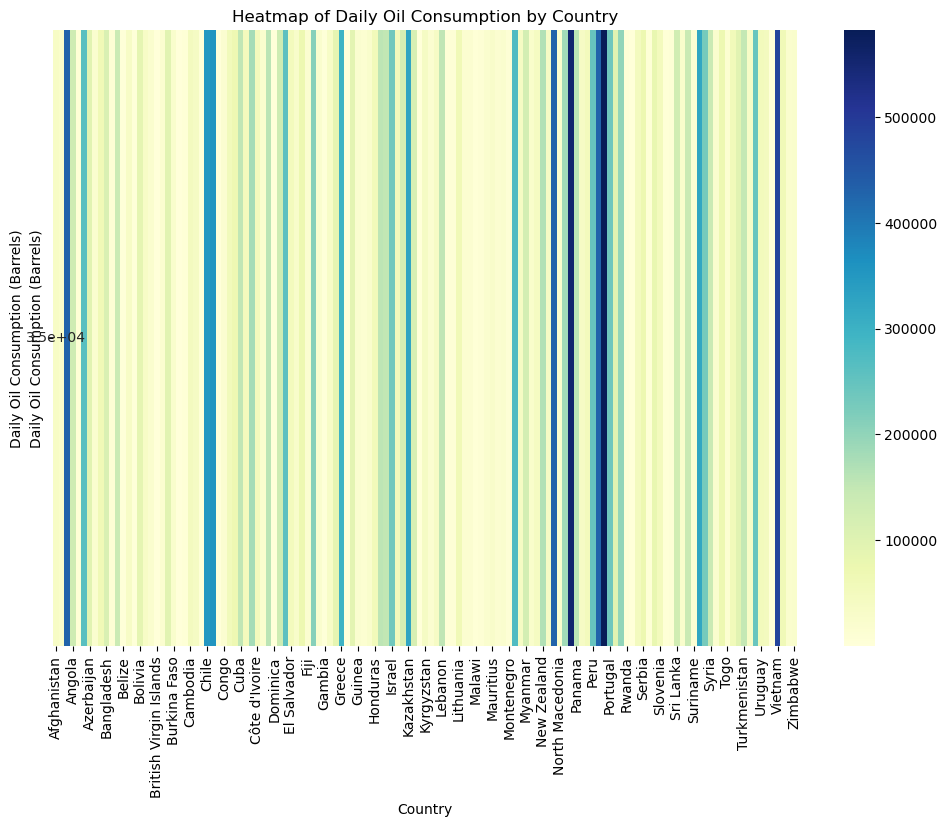

In [9]:
pivot_data = data.pivot_table(index='Country', values='Daily Oil Consumption (Barrels)', aggfunc='sum')

# Reset the index to prepare for heatmap
pivot_data = pivot_data.reset_index()

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_data.set_index('Country').transpose(), annot=True, cmap='YlGnBu')

plt.title('Heatmap of Daily Oil Consumption by Country')
plt.xlabel('Country')
plt.ylabel('Daily Oil Consumption (Barrels)')
plt.show()

In [ ]:
# 3. Decision Tree Regression

In [11]:

X_dtr = data[['Yearly Gallons Per Capita', 'Daily Oil Consumption (Barrels)']]
y_dtr = data['Price Per Gallon (USD)']
X_train_dtr, X_test_dtr, y_train_dtr, y_test_dtr = train_test_split(X_dtr, y_dtr, test_size=0.2, random_state=42)
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train_dtr, y_train_dtr)
y_pred_dtr = tree_regressor.predict(X_test_dtr)
mse_dtr = mean_squared_error(y_test_dtr, y_pred_dtr)
r2_dtr = r2_score(y_test_dtr, y_pred_dtr)
print(f"Decision Tree Regression MSE: {mse_dtr}, R2: {r2_dtr}")

Decision Tree Regression MSE: 10.226737037037038, R2: -2.1201977512853842


In [12]:
# 4. Random Forest Classification

In [13]:

data['Price_Category'] = pd.qcut(data['Price Per Gallon (USD)'], q=3, labels=[0, 1, 2])
X_rf = data[['Yearly Gallons Per Capita', 'Daily Oil Consumption (Barrels)']]
y_rf = data['Price_Category']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train_rf, y_train_rf)
y_pred_rf = random_forest_classifier.predict(X_test_rf)
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
class_report_rf = classification_report(y_test_rf, y_pred_rf)
print(f"Random Forest Classification Accuracy: {accuracy_rf}\nConfusion Matrix:\n{conf_matrix_rf}\nClassification Report:\n{class_report_rf}")

Random Forest Classification Accuracy: 0.5185185185185185
Confusion Matrix:
[[4 3 2]
 [4 4 1]
 [1 2 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.44      0.44      0.44         9
           2       0.67      0.67      0.67         9

    accuracy                           0.52        27
   macro avg       0.52      0.52      0.52        27
weighted avg       0.52      0.52      0.52        27



In [14]:
# 5. K-Means Clustering

In [18]:

X_kmeans = data[['Yearly Gallons Per Capita', 'Price Per Gallon (USD)', 'Daily Oil Consumption (Barrels)']]
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(X_kmeans)
print(data[['Country', 'Cluster']].head())



D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


        Country  Cluster
30     Pakistan        2
31       Poland        2
33      Vietnam        2
34      Nigeria        2
35  Philippines        2
